# TP OpenMP - October 2022
## Part 1 : Pi
### Compilation

In [1]:
# specify number of threads
#!export OMP NUM THREADS=2 ; ./prog

In [3]:
!g++ -o bin/tp_openmp_part_1_pi_critical tp_openmp_part_1_pi_critical.cpp -fopenmp -O3 -march=native

In [2]:
!g++ -o tp_openmp_part_1_pi_impl_reduce tp_openmp_part_1_pi_impl_reduce.cpp -fopenmp -O3 -march=native
!g++ -o tp_openmp_part_1_pi_impl_atomic tp_openmp_part_1_pi_impl_atomic.cpp -fopenmp -O3 -march=native

g++: error: tp_openmp_part_1_pi_impl_reduce.cpp: Aucun fichier ou dossier de ce type
g++: fatal error: no input files
compilation terminated.
g++: error: tp_openmp_part_1_pi_impl_atomic.cpp: Aucun fichier ou dossier de ce type
g++: fatal error: no input files
compilation terminated.


### Performance evaluation

In [4]:
# global vars
csv_result_file = "stats.csv"
csv_headers = {
    'version': str,
    'nb_threads': int,
    'num_steps' : int,
    'runtime' : float
}
color_num_steps = {
    100000 : "blue", 
    10000000 : "red", 
    1000000000 : "green",}
    #100000000000 : "black"}
num_steps = [list(color_num_steps.keys())[0]]
nb_threads = [1, 2, 4, 8]
repeats = range(0,10)

In [5]:
import os
import subprocess

try:
    os.remove(csv_result_file)
except OSError:
    pass

# create csv file
f = open(csv_result_file, "w")
f.write(",".join(csv_headers.keys()) + "\n")
f.close()

# exec
for nsteps in num_steps:
    for nb_thread in nb_threads:
        for repeat in repeats:
            args = ("./bin/tp_openmp_part_1_pi_critical", "-T", str(nb_thread), "-N", str(nsteps))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()
            
            # args = ("./bin/tp_openmp_part_1_pi_impl_reduce", "-T", str(nb_thread), "-N", str(nsteps))
            # popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            # popen.wait()

            # args = ("./bin/tp_openmp_part_1_pi_impl_atomic", "-T", str(nb_thread), "-N", str(nsteps))
            # popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            # popen.wait()



### Performance analysis
#### Weak scaling

,version,nb_threads,num_steps,runtime
0,critical,1,100000,0.001883
1,critical,1,100000,0.001698
2,critical,1,100000,0.001670
3,critical,1,100000,0.001666
4,critical,1,100000,0.001661
5,critical,1,100000,0.001674
6,critical,1,100000,0.001670
7,critical,1,100000,0.001660
8,critical,1,100000,0.001680
9,critical,1,100000,0.000959


,num_steps,version,nb_threads,runtime
0,100000,critical,1,0.001622
1,100000,critical,2,0.004240
2,100000,critical,4,0.006609
3,100000,critical,8,0.010281


,version,nb_threads,num_steps,runtime
0,critical,1,100000,0.001883
1,critical,1,100000,0.001698
2,critical,1,100000,0.001670
3,critical,1,100000,0.001666
4,critical,1,100000,0.001661
5,critical,1,100000,0.001674
6,critical,1,100000,0.001670
7,critical,1,100000,0.001660
8,critical,1,100000,0.001680
9,critical,1,100000,0.000959


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


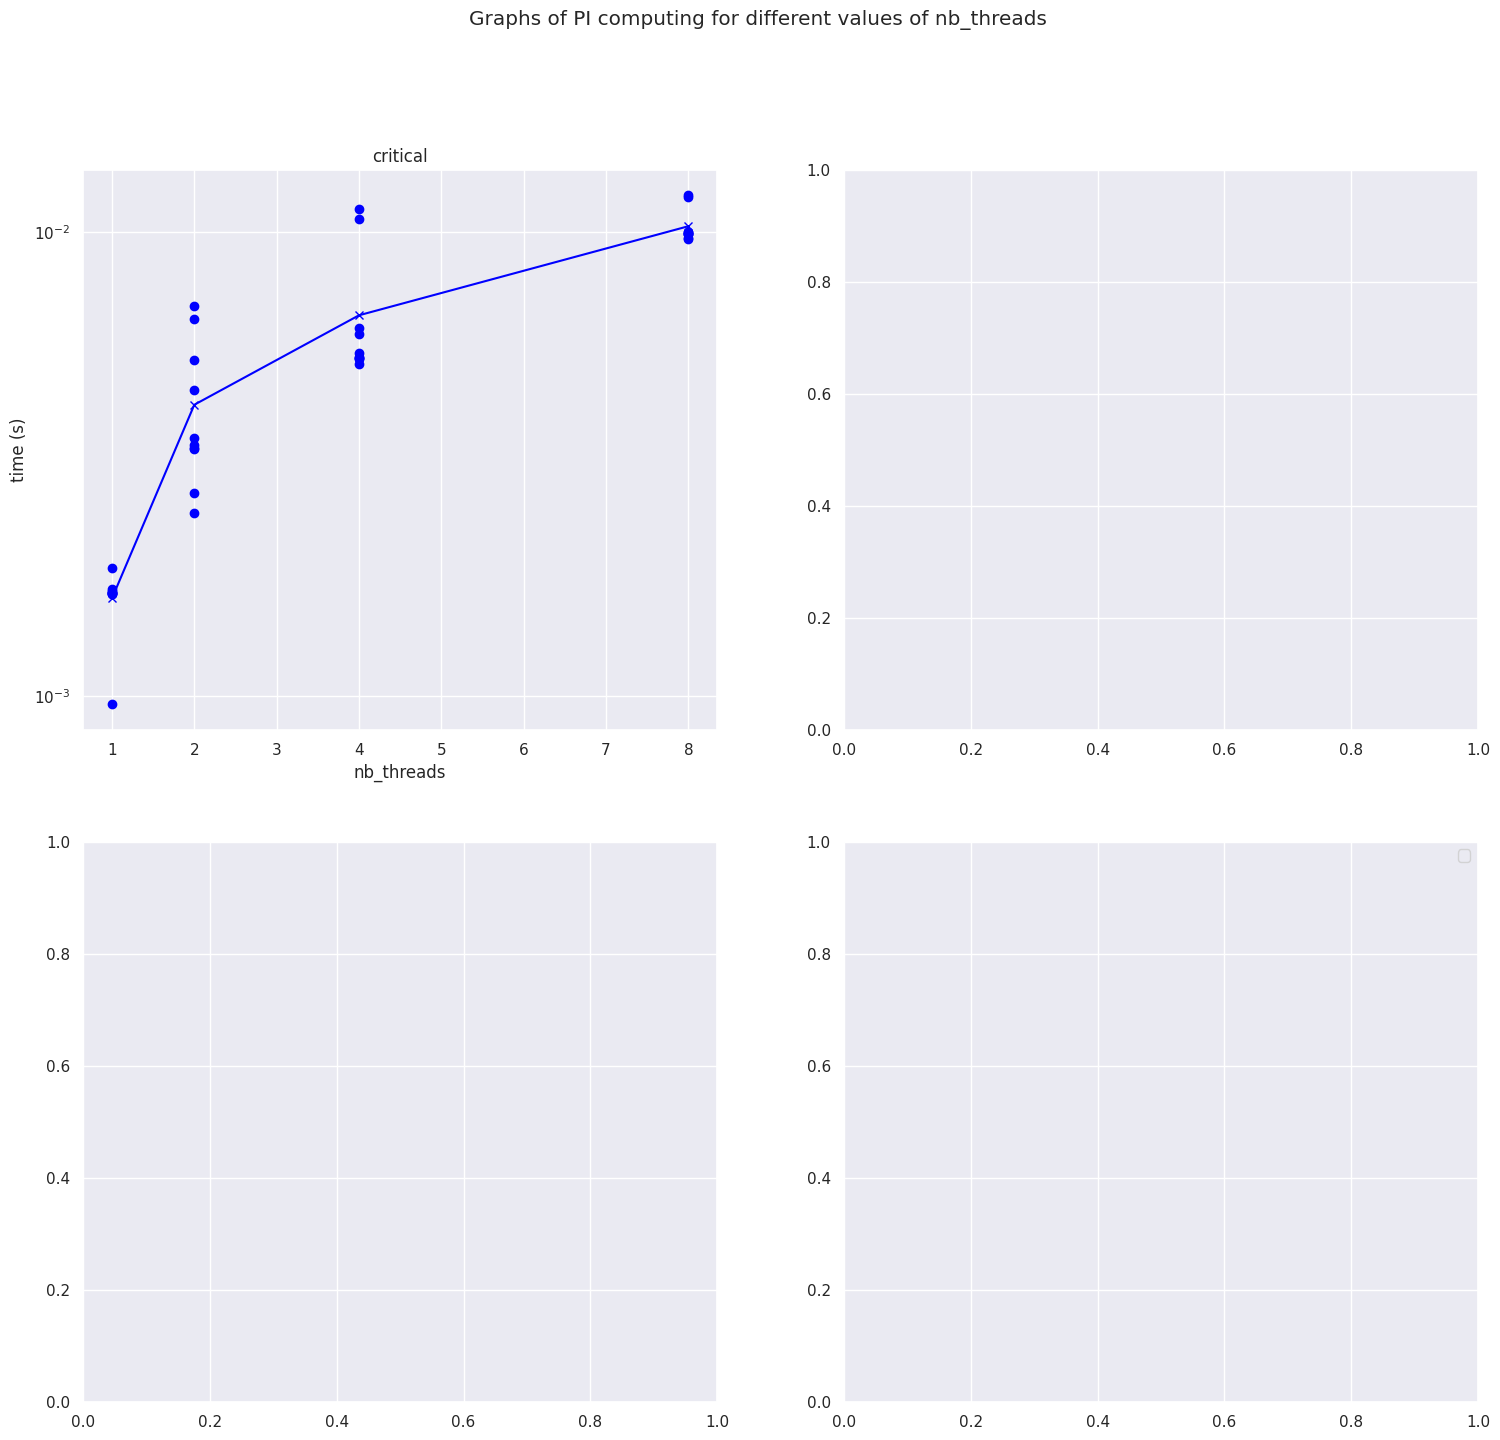

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from numpy import genfromtxt
import itertools
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()


df = pd.read_csv(
    csv_result_file,
    header=0, # line number of header
    dtype=csv_headers
)
display(df.head(10))

# display graphs
fig, axes = plt.subplots(2, 2, figsize=(18,16))
fig.suptitle("Graphs of PI computing for different values of nb_threads")

unique_nb_steps = df['num_steps'].unique()
nb_different_num_steps = len(unique_nb_steps)
for i in range(nb_different_num_steps):
    current_num_steps = int(unique_nb_steps[i])
    df_plot = df[(df['num_steps'] == current_num_steps)]
    mean_stats = df.groupby(['num_steps','version','nb_threads']).mean().reset_index()
    display(mean_stats.head(10))

    # first graph: critical
    graph_version = "critical"
    df_plot_0 = df_plot[df_plot['version'] == "critical"]
    display(df_plot.head(10))
    axes[0][0].plot(
        mean_stats['nb_threads'], 
        mean_stats['runtime'],
        linestyle="solid",
        color=color_num_steps[current_num_steps],
        marker='x',
    )
    axes[0][0].set(
        yscale="log",
        xlabel="nb_threads",
        ylabel="time (s)",
        title=graph_version
    )
    axes[0][0].scatter(
        df_plot_0['nb_threads'], 
        df_plot_0['runtime'],
        color=color_num_steps[current_num_steps]
    )

    # df_plot = df[(df['num_steps'] == num_steps) & (df['version'] == "reduce")]
    # mean_stats = df_plot.groupby(['num_steps','version','nb_threads']).mean().reset_index()
    
    # plt.plot(mean_stats['nb_threads'], mean_stats['runtime'],linestyle="dashed",color=color_num_steps[num_steps])
    # plt.yscale('log')
    # plt.xscale('log')
    # plt.scatter(df_plot['nb_threads'], df_plot['runtime'],color=color_num_steps[num_steps])
    
plt.legend()
plt.show()

#### Strong Scaling

### Discussion